In [ ]:
#######################################################################
# Copyright (C)                                                       #
# 2016-2018 Shangtong Zhang(zhangshangtong.cpp@gmail.com)             #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# goal
GOAL = 100

# all states, including state 0 and state 100
STATES = np.arange(GOAL + 1)

# probability of head
HEAD_PROB = 0.4

In [3]:
def figure_4_3():
    # state value
    state_value = np.zeros(GOAL + 1)
    state_value[GOAL] = 1.0

    sweeps_history = []

    # value iteration
    while True:
        old_state_value = state_value.copy()
        sweeps_history.append(old_state_value)

        for state in STATES[1:GOAL]:
            # get possible actions for current state
            actions = np.arange(min(state, GOAL - state) + 1)
            action_returns = []
            for action in actions:
                action_returns.append(
                    HEAD_PROB * state_value[state + action] + (1 - HEAD_PROB) * state_value[state - action])
            new_value = np.max(action_returns)
            state_value[state] = new_value
        delta = abs(state_value - old_state_value).max()
        if delta < 1e-9:
            sweeps_history.append(state_value)
            break
    
    # compute the optimal policy
    policy = np.zeros(GOAL + 1)
    for state in STATES[1:GOAL]:
        actions = np.arange(min(state, GOAL - state) + 1)
        action_returns = []
        for action in actions:
            action_returns.append(
                HEAD_PROB * state_value[state + action] + (1 - HEAD_PROB) * state_value[state - action])
        
        policy[state] = actions[np.argmax(np.round(action_returns[1:], 5)) + 1]

    plt.figure(figsize=(10,20))
    xticks = np.insert(np.arange(0, GOAL+1, 25), 1, 1)
    sample_indices = np.unique(np.linspace(0, len(sweeps_history)-1, 20, dtype=np.int))

    plt.subplot(2, 1, 1)
    for sweep, state_value in zip(sample_indices, np.take(sweeps_history, sample_indices, axis=0)):
        plt.plot(state_value, label="sweep {}".format(sweep))
    plt.xlabel("Capital")
    plt.xticks(xticks)
    plt.ylabel("Value estimates")
    plt.legend(loc='best')

    plt.subplot(2, 1, 2)
    plt.scatter(STATES, policy)
    plt.xlabel("Capital")
    plt.xticks(xticks)
    plt.ylabel("Final policy (stake)")
    
    plt.show()

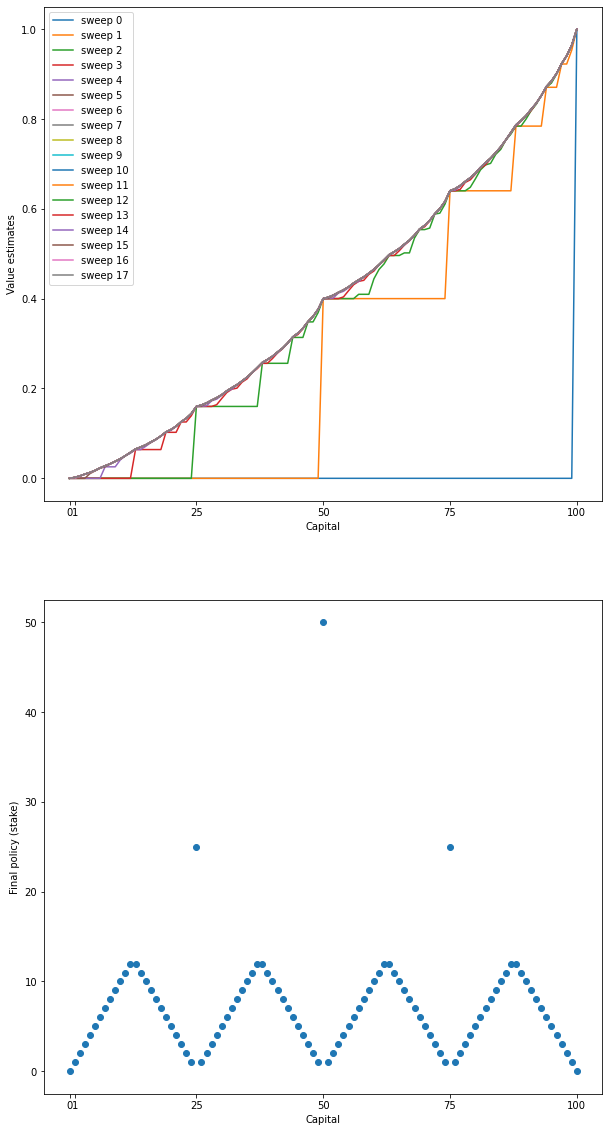

In [4]:
figure_4_3()